# Heart Disease Classification

<br>*Matit Leesathapron . Sithan Janetunyalux . Yanisa Nitisaropas*

Last Edited : 1st February 2020 Sat 20:03<br>
Helsinki Metropolia University of Applied Sciences

### Background

Diagnostic decision is one of the fields in health technology application which can be implemented by using machine learning algorithms. This document<br> aims to investigate heart disease classification. 
The computation was implemented by using Keras' Neural Network to examine the given heart disease<br> dataset and provide effective model to predict the presence of heart disease.

The main objective is to investigate various techniques for data preprocessing and imputation of missing values in the dataset.
Also, trying different neural network architectures, batch sizes and number of epochs for training data is to find the best possible model for prediction.The results are then compared<br> using performance metrics such as accuracy and loss function to see whether which components affect the efficiency of the outcomes.


### Data

The dataset used for computing the model was collected from V.A. Medical Center, Long Beach and Cleveland Clinic Foundation by the investigator<br> named Robert Detrano, M.D., Ph.D.

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#### Read in the dataset from .csv file

In [3]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', index_col=None, header=None, names=cols, na_values='?')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


There are 303 number of instances in this dataset. Each instance has 14 attributed variables as following :

    1. age : age in years
    2. sex : sex (1 = male; 0 = female)
    3. cp  : chest pain type
       -- Value 1: typical angina
       -- Value 2: atypical angina
       -- Value 3: non-anginal pain
       -- Value 4: asymptomatic
    4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)
    5. chol : serum cholestoral in mg/dl   
    6. fbs  : (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
    7. restecg  : resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    8. thalach : maximum heart rate achieved
    9. exang   : exercise induced angina (1 = yes; 0 = no)
    10. oldpeak : ST depression induced by exercise relative to rest
    11. slope   : the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
    12. ca : number of major vessels (0-3) colored by flourosopy
    13. thal  : 3 = normal; 6 = fixed defect; 7 = reversable defect
    14. num   : diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)



<br>The descriptive statistics of this dataset is shown below:


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


#### See missing variables in the dataset

In [5]:
df[df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


The dataset contains some missing values in the following variables: ca and thal.

Those values are imputated by using various techniques such as filling with zero, mean, median or random values before training in the neural network.


#### Fill the missing value with zero

In [6]:
df = df.fillna(0) 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


#### Separate Data and Label

In [7]:
data = df.iloc[:, 0:13]
labels = df.iloc[:, 13]

The first 13 variables are used as data for heart disease analysis while the last attribute is the predicted variable. 

#### Treat any value higher than one as one

In [8]:
labels = labels.replace(2,1)
labels = labels.replace(3,1)
labels = labels.replace(4,1)

In the original dataset, predicted variables have values range from 0 to 4 representing a healthy condition of heart. The value 0 indicates healthy heart while the value 4 indicates severely unhealthy heart. For this document, 0 to 4 class labels were changed to a binary classification. The predicted class can be <br> either 0 or 1, meaning the heart is either Healthy(0) or Unhealthy(1). Therefore, the value that is greater than 0 is decided to be labeled as class 1.

### Data Preprocessing

Before building the model, the raw variables are changed into a representation that is more suitable for computating in neural network.<br> Techniques such as scikit-learn’s StandardScaler and normalization are implemented in preprocessing phase.


#### Convert Dataframe to Numpy array

In [9]:
data = data.to_numpy()
labels = labels.to_numpy()

#### Preprocessing data using StandardScaler

In [10]:
scaler = preprocessing.StandardScaler().fit(data)

In [11]:
data_scaler = scaler.transform(data)

### Models and Training

#### Split data into Training set, Validation set and Testing set

In [12]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, random_state=112, test_size=0.20)

In [13]:
data_train_partial, data_val, labels_train_partial, labels_val = train_test_split(data_train, labels_train, random_state=112, test_size=0.25)

The data is split using the ratio of (60:20:20). First, the data is divided into training set and testing set with a ratio of (80:20).<br>Then the training set is split into train set and validation set with a ratio of (75:25).

Total : 303 data --- Training set : 181 data , Validation set : 61 data , Testing set : 61 data   <br>

#### Construct the Model Architecture

In [14]:
model = Sequential()
model.add(Dense(13, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

We used the sequential model for this case with 1 input layer, 1 hidden layer with 13 neurons and rectified linear unit (ReLU) activation function mathematically defined as y = max(0,x) , and 1 output layer with 1 neuron and sigmoid activation function mathematically defined as y = 1/1+e^-x.

Then we compile the model with adaptive moment estimation (Adam) optimizer which is the combination of RMSprop and Momentum, binary cross-entropy loss function which is the entropy of classification and output the accuracy of the model.

#### Build the Model

We train the model using epoch equal to 200 and batch sizes equal to 1 to find the best epoch for our model.

In [15]:
history = model.fit(data_train_partial, labels_train_partial, epochs=200, batch_size=1, validation_data=(data_val, labels_val))

Train on 181 samples, validate on 61 samples
Epoch 1/200
181/181 [==============================] - 1s 7ms/sample - loss: 3.7122 - accuracy: 0.5470 - val_loss: 3.2121 - val_accuracy: 0.5574
Epoch 2/200
181/181 [==============================] - 0s 2ms/sample - loss: 1.9779 - accuracy: 0.5414 - val_loss: 1.5598 - val_accuracy: 0.5738
Epoch 3/200
181/181 [==============================] - 0s 2ms/sample - loss: 1.2997 - accuracy: 0.5359 - val_loss: 0.9694 - val_accuracy: 0.6557
Epoch 4/200
181/181 [==============================] - 0s 2ms/sample - loss: 1.2228 - accuracy: 0.5691 - val_loss: 1.2333 - val_accuracy: 0.6721
Epoch 5/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.9331 - accuracy: 0.6188 - val_loss: 0.5424 - val_accuracy: 0.8197
Epoch 6/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.7622 - accuracy: 0.6851 - val_loss: 0.4940 - val_accuracy: 0.7049
Epoch 7/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.7985 -

Epoch 57/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.5198 - accuracy: 0.8011 - val_loss: 0.4331 - val_accuracy: 0.8361
Epoch 58/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.5152 - accuracy: 0.8177 - val_loss: 0.4123 - val_accuracy: 0.8197
Epoch 59/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.6365 - accuracy: 0.8011 - val_loss: 0.5125 - val_accuracy: 0.8361
Epoch 60/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.5799 - accuracy: 0.7845 - val_loss: 0.5492 - val_accuracy: 0.7705
Epoch 61/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4889 - accuracy: 0.7790 - val_loss: 0.3025 - val_accuracy: 0.9016
Epoch 62/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.5474 - accuracy: 0.7901 - val_loss: 0.4697 - val_accuracy: 0.8033
Epoch 63/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.6132 - accuracy: 0.7680 - val_loss: 0.4197 -

181/181 [==============================] - 0s 2ms/sample - loss: 0.4399 - accuracy: 0.8287 - val_loss: 0.3210 - val_accuracy: 0.8852
Epoch 114/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4437 - accuracy: 0.8287 - val_loss: 0.4710 - val_accuracy: 0.8525
Epoch 115/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.5506 - accuracy: 0.7901 - val_loss: 0.2897 - val_accuracy: 0.9016
Epoch 116/200
181/181 [==============================] - 1s 3ms/sample - loss: 0.4644 - accuracy: 0.7956 - val_loss: 0.3576 - val_accuracy: 0.8689
Epoch 117/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.5696 - accuracy: 0.8122 - val_loss: 0.2907 - val_accuracy: 0.9016
Epoch 118/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4793 - accuracy: 0.8011 - val_loss: 0.3884 - val_accuracy: 0.8689
Epoch 119/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4757 - accuracy: 0.8066 - val_loss: 0.3258 - val_ac

Epoch 169/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4224 - accuracy: 0.8398 - val_loss: 0.4346 - val_accuracy: 0.8361
Epoch 170/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4695 - accuracy: 0.8066 - val_loss: 0.4088 - val_accuracy: 0.8689
Epoch 171/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4392 - accuracy: 0.8564 - val_loss: 0.3528 - val_accuracy: 0.8689
Epoch 172/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.5015 - accuracy: 0.7901 - val_loss: 0.3212 - val_accuracy: 0.9016
Epoch 173/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4581 - accuracy: 0.8343 - val_loss: 0.3265 - val_accuracy: 0.8689
Epoch 174/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.3902 - accuracy: 0.8343 - val_loss: 0.3287 - val_accuracy: 0.9180
Epoch 175/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4384 - accuracy: 0.8011 - val_loss: 0

### Results

#### Plot the training and validation Loss and Accuracy Graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


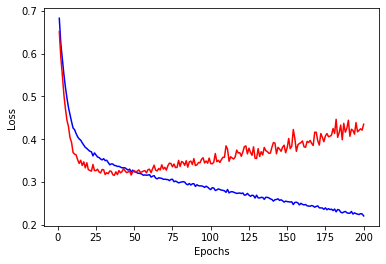

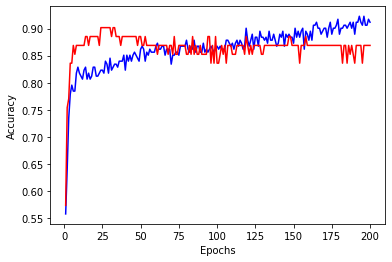

In [36]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, accuracy, 'b-')
plt.plot(time, val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#### Cut off the first few data points

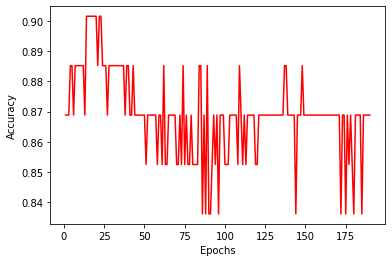

In [37]:
short_val_accuracy = val_accuracy[10:]

plt.plot(range(1,len(short_val_accuracy)+1), short_val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#### Smoothen the previous curve for clarity

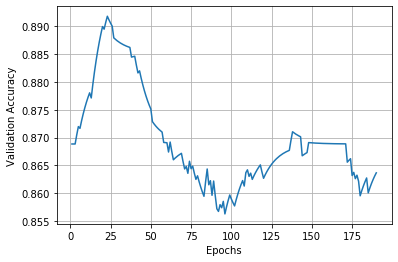

In [39]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_accuracy = smooth_curve(val_accuracy[10:])

plt.plot(range(1, len(smooth_val_accuracy) + 1), smooth_val_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid()
plt.show()

From the graph, it shows that the validation accuracy reaches the highest point of approximately 0.88 at around 33 epochs, so we try to rebuild the model by changing the epoch size to the optimal one.

### Rebuild the Model

In [40]:
# Build a fresh model ...

model = Sequential()
model.add(Dense(13, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
# ... and train it for a shorter time for less overfitting 
# (now with all the training data, including the samples previously used for validation)

history = model.fit(data_train, labels_train, epochs=35, batch_size=1)

Train on 242 samples
Epoch 1/35
242/242 [==============================] - 1s 4ms/sample - loss: 0.6715 - accuracy: 0.5992
Epoch 2/35
242/242 [==============================] - 0s 2ms/sample - loss: 0.6039 - accuracy: 0.7231
Epoch 3/35
242/242 [==============================] - 1s 2ms/sample - loss: 0.5417 - accuracy: 0.7521
Epoch 4/35
242/242 [==============================] - 1s 2ms/sample - loss: 0.4947 - accuracy: 0.8099
Epoch 5/35
242/242 [==============================] - 1s 2ms/sample - loss: 0.4566 - accuracy: 0.7934
Epoch 6/35
242/242 [==============================] - 1s 2ms/sample - loss: 0.4320 - accuracy: 0.8306
Epoch 7/35
242/242 [==============================] - 1s 2ms/sample - loss: 0.4141 - accuracy: 0.8182
Epoch 8/35
242/242 [==============================] - 1s 2ms/sample - loss: 0.3987 - accuracy: 0.8388
Epoch 9/35
242/242 [==============================] - 1s 2ms/sample - loss: 0.3882 - accuracy: 0.8430
Epoch 10/35
242/242 [==============================] - 1s 2ms

#### Test the Model 

In [42]:
# Test the model with new unseen data

test_mse_score, test_accuracy_score = model.evaluate(data_test, labels_test)

61/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [43]:
# Taking a look at test data predictions versus true targets

results = model.predict(data_test)

for i in range(len(results)):
    print(labels_test[i], results[i])

1 [0.857316]
0 [0.03551963]
1 [0.8011446]
1 [0.8710058]
1 [0.91947377]
1 [0.85537505]
1 [0.9601927]
1 [0.5813047]
0 [0.18981615]
1 [0.9737699]
0 [0.10051557]
1 [0.99005246]
0 [0.04602689]
1 [0.7892028]
0 [0.093115]
0 [0.32957232]
0 [0.26038468]
0 [0.06255776]
1 [0.6680758]
0 [0.03820217]
1 [0.24580845]
0 [0.01798266]
1 [0.76979077]
0 [0.13330993]
0 [0.0278914]
0 [0.10940108]
1 [0.9338182]
0 [0.02470016]
1 [0.05828726]
1 [0.67990977]
1 [0.8195918]
0 [0.6246916]
1 [0.03778404]
1 [0.3827496]
1 [0.97940135]
0 [0.7408514]
1 [0.88605964]
1 [0.30819726]
0 [0.0470362]
1 [0.09115446]
1 [0.9571786]
1 [0.06222266]
1 [0.7127226]
1 [0.17094427]
0 [0.03801301]
1 [0.96536136]
1 [0.94062734]
0 [0.03776059]
1 [0.99064654]
0 [0.05647829]
0 [0.04938719]
1 [0.98671806]
0 [0.18345675]
0 [0.02276775]
0 [0.1042257]
1 [0.69254375]
1 [0.97315454]
1 [0.98958606]
1 [0.8664002]
1 [0.9953387]
0 [0.9708552]


###  Imputing the missing values with zero (same data) and Preprocessing data using Normalization

#### Preprocessing data using Normalization

In [44]:
minmax_scaler = preprocessing.MinMaxScaler()

In [45]:
data = minmax_scaler.fit_transform(data)

### Models and Training

#### Split data into Training set, Validation set and Testing set

In [46]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, random_state=112, test_size=0.20)

In [47]:
data_train_partial, data_val, labels_train_partial, labels_val = train_test_split(data_train, labels_train, random_state=112, test_size=0.25)

#### Construct the Model Architecture

In [48]:
model = Sequential()
model.add(Dense(13, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Build the Model

We train the model using epoch equal to 200 and batch sizes equal to 1 to find the best epoch for our model.

In [49]:
history = model.fit(data_train_partial, labels_train_partial, epochs=200, batch_size=1, validation_data=(data_val, labels_val))

Train on 181 samples, validate on 61 samples
Epoch 1/200
181/181 [==============================] - 1s 8ms/sample - loss: 0.6466 - accuracy: 0.6851 - val_loss: 0.6097 - val_accuracy: 0.7869
Epoch 2/200
181/181 [==============================] - 1s 4ms/sample - loss: 0.6114 - accuracy: 0.8066 - val_loss: 0.5675 - val_accuracy: 0.8689
Epoch 3/200
181/181 [==============================] - 1s 4ms/sample - loss: 0.5778 - accuracy: 0.8287 - val_loss: 0.5337 - val_accuracy: 0.8689
Epoch 4/200
181/181 [==============================] - 1s 3ms/sample - loss: 0.5489 - accuracy: 0.8287 - val_loss: 0.5090 - val_accuracy: 0.8525
Epoch 5/200
181/181 [==============================] - 1s 4ms/sample - loss: 0.5205 - accuracy: 0.8232 - val_loss: 0.4712 - val_accuracy: 0.8852
Epoch 6/200
181/181 [==============================] - 1s 4ms/sample - loss: 0.4946 - accuracy: 0.8343 - val_loss: 0.4409 - val_accuracy: 0.8689
Epoch 7/200
181/181 [==============================] - 1s 4ms/sample - loss: 0.4742 -

Epoch 57/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2737 - accuracy: 0.8785 - val_loss: 0.3094 - val_accuracy: 0.9180
Epoch 58/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2683 - accuracy: 0.8619 - val_loss: 0.3145 - val_accuracy: 0.9180
Epoch 59/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2702 - accuracy: 0.8729 - val_loss: 0.3161 - val_accuracy: 0.9016
Epoch 60/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2680 - accuracy: 0.8895 - val_loss: 0.3061 - val_accuracy: 0.9016
Epoch 61/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2669 - accuracy: 0.8840 - val_loss: 0.3115 - val_accuracy: 0.9180
Epoch 62/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2631 - accuracy: 0.8895 - val_loss: 0.3087 - val_accuracy: 0.9016
Epoch 63/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2614 - accuracy: 0.8840 - val_loss: 0.3284 -

181/181 [==============================] - 0s 2ms/sample - loss: 0.2110 - accuracy: 0.9227 - val_loss: 0.3931 - val_accuracy: 0.8525
Epoch 114/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2067 - accuracy: 0.9171 - val_loss: 0.4195 - val_accuracy: 0.8525
Epoch 115/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2055 - accuracy: 0.9116 - val_loss: 0.3807 - val_accuracy: 0.8361
Epoch 116/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2092 - accuracy: 0.9282 - val_loss: 0.3912 - val_accuracy: 0.8525
Epoch 117/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2056 - accuracy: 0.9282 - val_loss: 0.4050 - val_accuracy: 0.8525
Epoch 118/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2036 - accuracy: 0.9227 - val_loss: 0.3943 - val_accuracy: 0.8525
Epoch 119/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2073 - accuracy: 0.9116 - val_loss: 0.4057 - val_ac

Epoch 169/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1707 - accuracy: 0.9503 - val_loss: 0.4858 - val_accuracy: 0.8361
Epoch 170/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1655 - accuracy: 0.9503 - val_loss: 0.5038 - val_accuracy: 0.8361
Epoch 171/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1683 - accuracy: 0.9503 - val_loss: 0.4971 - val_accuracy: 0.8361
Epoch 172/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1672 - accuracy: 0.9558 - val_loss: 0.4958 - val_accuracy: 0.8361
Epoch 173/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1663 - accuracy: 0.9558 - val_loss: 0.5044 - val_accuracy: 0.8197
Epoch 174/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1634 - accuracy: 0.9558 - val_loss: 0.5198 - val_accuracy: 0.8197
Epoch 175/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1669 - accuracy: 0.9558 - val_loss: 0

### Results

#### Plot the training and validation Loss and Accuracy Graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


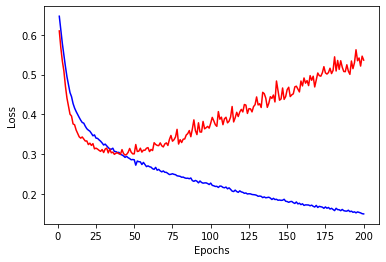

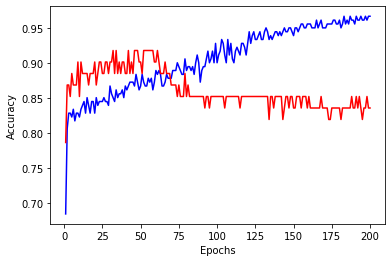

In [50]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, accuracy, 'b-')
plt.plot(time, val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

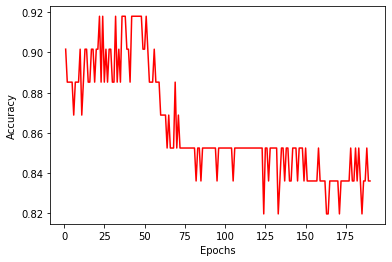

In [51]:
# Cut off the first few data points

short_val_accuracy = val_accuracy[10:]

plt.plot(range(1,len(short_val_accuracy)+1), short_val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

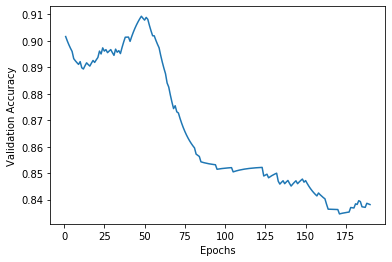

In [52]:
# Smoothen the previous curve for clarity

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_accuracy = smooth_curve(val_accuracy[10:])

plt.plot(range(1, len(smooth_val_accuracy) + 1), smooth_val_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

From the graph, it shows that the validation accuracy reaches the highest point of approximately 0.91 at around 60 epochs, so we try to rebuild the model by changing the epoch size to the optimal one.

#### Rebuild the Model

In [53]:
# Build a fresh model ...

model = Sequential()
model.add(Dense(13, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
# ... and train it for a shorter time for less overfitting 
# (now with all the training data, including the samples previously used for validation)

history = model.fit(data_train, labels_train, epochs=60, batch_size=1)

Train on 242 samples
Epoch 1/60
242/242 [==============================] - 1s 4ms/sample - loss: 0.6971 - accuracy: 0.5744
Epoch 2/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.6856 - accuracy: 0.5785
Epoch 3/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.6499 - accuracy: 0.5744
Epoch 4/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.6164 - accuracy: 0.6446
Epoch 5/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.5702 - accuracy: 0.7190
Epoch 6/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.5145 - accuracy: 0.8099
Epoch 7/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.4731 - accuracy: 0.8306
Epoch 8/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.4423 - accuracy: 0.8347
Epoch 9/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.4205 - accuracy: 0.8264
Epoch 10/60
242/242 [==============================] - 0s 2ms

#### Test the Model

In [55]:
# Test the model with new unseen data

test_mse_score, test_accuracy_score = model.evaluate(data_test, labels_test)

61/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [56]:
# Taking a look at test data predictions versus true targets

results = model.predict(data_test)

for i in range(len(results)):
    print(labels_test[i], results[i])

1 [0.9416197]
0 [0.02555147]
1 [0.7541064]
1 [0.82163656]
1 [0.9441073]
1 [0.483265]
1 [0.92929053]
1 [0.6572558]
0 [0.18803915]
1 [0.9521073]
0 [0.02566832]
1 [0.9885746]
0 [0.04528871]
1 [0.3471412]
0 [0.1111944]
0 [0.45645562]
0 [0.35422495]
0 [0.07838902]
1 [0.56029016]
0 [0.01450801]
1 [0.29189026]
0 [0.01348945]
1 [0.8730671]
0 [0.10034752]
0 [0.00550503]
0 [0.1575805]
1 [0.934974]
0 [0.01486197]
1 [0.05773517]
1 [0.64621776]
1 [0.8861785]
0 [0.6845891]
1 [0.02440524]
1 [0.4729108]
1 [0.9615202]
0 [0.7365111]
1 [0.86733514]
1 [0.46326634]
0 [0.06389108]
1 [0.02627867]
1 [0.9459333]
1 [0.0354414]
1 [0.86220217]
1 [0.14959049]
0 [0.01831871]
1 [0.96401817]
1 [0.9489653]
0 [0.03099954]
1 [0.9836383]
0 [0.0273464]
0 [0.02697513]
1 [0.9818714]
0 [0.1853939]
0 [0.00812283]
0 [0.04482919]
1 [0.80643356]
1 [0.9862045]
1 [0.9842867]
1 [0.92732203]
1 [0.9908384]
0 [0.9731646]


###  Imputing the missing values with Mean and Preprocessing data using StandardScaler

### Data

#### Read in the dataset from .csv file

In [57]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', index_col=None, header=None, names=cols, na_values='?')

#### Fill the missing value with mean

In [58]:
df = df.fillna(df.mean())
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1


#### Separate Data and Label

In [59]:
data = df.iloc[:, 0:13]
labels = df.iloc[:, 13]

#### Treat any value higher than one as one

In [60]:
labels = labels.replace(2,1)
labels = labels.replace(3,1)
labels = labels.replace(4,1)

### Data Preprocessing

#### Convert Dataframe to Numpy Array

In [61]:
data = data.to_numpy()
labels = labels.to_numpy()

#### Preprocessing data using StandardScaler

In [62]:
scaler = preprocessing.StandardScaler().fit(data)

In [63]:
data_scaler = scaler.transform(data)

### Models and Training

#### Split data into Training set, Validation set and Testing set

In [64]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, random_state=112, test_size=0.20)

In [65]:
data_train_partial, data_val, labels_train_partial, labels_val = train_test_split(data_train, labels_train, random_state=112, test_size=0.25)

#### Construct the Model Architecture

In [66]:
model = Sequential()
model.add(Dense(13, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Build the Model

We train the model using epoch equal to 200 and batch sizes equal to 1 to find the best epoch for our model.

In [67]:
history = model.fit(data_train_partial, labels_train_partial, epochs=200, batch_size=1, validation_data=(data_val, labels_val))

Train on 181 samples, validate on 61 samples
Epoch 1/200
181/181 [==============================] - 1s 8ms/sample - loss: 3.0022 - accuracy: 0.4586 - val_loss: 1.0682 - val_accuracy: 0.5738
Epoch 2/200
181/181 [==============================] - 0s 3ms/sample - loss: 1.2349 - accuracy: 0.5525 - val_loss: 0.6634 - val_accuracy: 0.6557
Epoch 3/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.9211 - accuracy: 0.6133 - val_loss: 0.5404 - val_accuracy: 0.7049
Epoch 4/200
181/181 [==============================] - 1s 3ms/sample - loss: 0.7961 - accuracy: 0.6354 - val_loss: 0.5081 - val_accuracy: 0.8197
Epoch 5/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.6942 - accuracy: 0.6851 - val_loss: 0.4642 - val_accuracy: 0.8525
Epoch 6/200
181/181 [==============================] - 1s 4ms/sample - loss: 0.5840 - accuracy: 0.7624 - val_loss: 0.4249 - val_accuracy: 0.8361
Epoch 7/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.6297 -

Epoch 57/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4975 - accuracy: 0.7901 - val_loss: 0.4493 - val_accuracy: 0.8525
Epoch 58/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.6129 - accuracy: 0.7569 - val_loss: 0.3764 - val_accuracy: 0.8525
Epoch 59/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4912 - accuracy: 0.8122 - val_loss: 0.3249 - val_accuracy: 0.9016
Epoch 60/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.5115 - accuracy: 0.8122 - val_loss: 0.3449 - val_accuracy: 0.8852
Epoch 61/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4958 - accuracy: 0.8343 - val_loss: 0.5459 - val_accuracy: 0.8525
Epoch 62/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4929 - accuracy: 0.8177 - val_loss: 0.4893 - val_accuracy: 0.7705
Epoch 63/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.5829 - accuracy: 0.7901 - val_loss: 0.3551 -

181/181 [==============================] - 0s 2ms/sample - loss: 0.5182 - accuracy: 0.8122 - val_loss: 0.3581 - val_accuracy: 0.8689
Epoch 114/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4768 - accuracy: 0.8287 - val_loss: 0.3407 - val_accuracy: 0.9016
Epoch 115/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4486 - accuracy: 0.8066 - val_loss: 0.3400 - val_accuracy: 0.8689
Epoch 116/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4706 - accuracy: 0.8011 - val_loss: 0.3429 - val_accuracy: 0.8525
Epoch 117/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4339 - accuracy: 0.8177 - val_loss: 0.4211 - val_accuracy: 0.8361
Epoch 118/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.5097 - accuracy: 0.7735 - val_loss: 0.3570 - val_accuracy: 0.8689
Epoch 119/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4435 - accuracy: 0.8398 - val_loss: 0.4758 - val_ac

Epoch 169/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.5337 - accuracy: 0.8011 - val_loss: 0.6082 - val_accuracy: 0.7377
Epoch 170/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4502 - accuracy: 0.8398 - val_loss: 0.4091 - val_accuracy: 0.8361
Epoch 171/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4534 - accuracy: 0.8011 - val_loss: 0.4471 - val_accuracy: 0.7869
Epoch 172/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4182 - accuracy: 0.8343 - val_loss: 0.3289 - val_accuracy: 0.9016
Epoch 173/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4355 - accuracy: 0.8122 - val_loss: 0.4271 - val_accuracy: 0.8197
Epoch 174/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4181 - accuracy: 0.8287 - val_loss: 0.6061 - val_accuracy: 0.8197
Epoch 175/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.5216 - accuracy: 0.8011 - val_loss: 0

### Results

#### Plot the training and validation Loss and Accuracy Graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


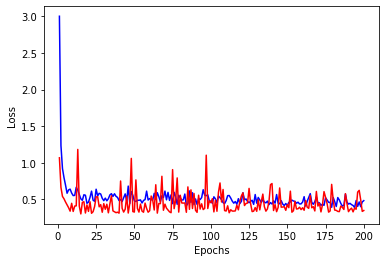

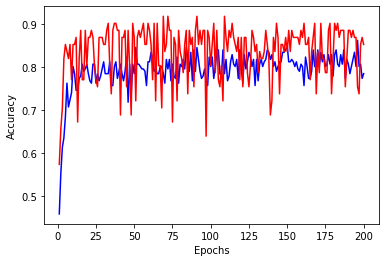

In [68]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, accuracy, 'b-')
plt.plot(time, val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

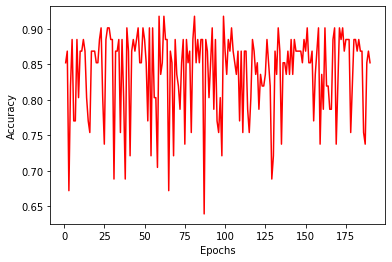

In [69]:
# Cut off the first few data points

short_val_accuracy = val_accuracy[10:]

plt.plot(range(1,len(short_val_accuracy)+1), short_val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

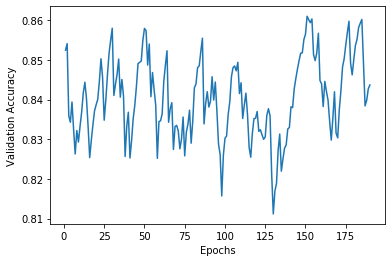

In [70]:
# Smoothen the previous curve for clarity

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_accuracy = smooth_curve(val_accuracy[10:])

plt.plot(range(1, len(smooth_val_accuracy) + 1), smooth_val_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

From the graph, it shows that the validation accuracy reaches the highest point of approximately 0.88 at around 160 epochs, so we try to rebuild the model by changing the epoch size to the optimal one.

#### Rebuild the Model

In [71]:
# Build a fresh model ...

model = Sequential()
model.add(Dense(13, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
# ... and train it for a shorter time for less overfitting 
# (now with all the training data, including the samples previously used for validation)

history = model.fit(data_train, labels_train, epochs=160, batch_size=1)

Train on 242 samples
Epoch 1/160
242/242 [==============================] - 1s 4ms/sample - loss: 14.1080 - accuracy: 0.5083
Epoch 2/160
242/242 [==============================] - 0s 2ms/sample - loss: 1.1971 - accuracy: 0.6116
Epoch 3/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.7434 - accuracy: 0.7149
Epoch 4/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.7836 - accuracy: 0.7190
Epoch 5/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.7019 - accuracy: 0.7066
Epoch 6/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.5657 - accuracy: 0.7686
Epoch 7/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.6993 - accuracy: 0.7479
Epoch 8/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.5388 - accuracy: 0.7769
Epoch 9/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.6765 - accuracy: 0.7438
Epoch 10/160
242/242 [=============================

242/242 [==============================] - 0s 2ms/sample - loss: 0.4913 - accuracy: 0.8058
Epoch 80/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.4936 - accuracy: 0.8347
Epoch 81/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.5019 - accuracy: 0.8099
Epoch 82/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.4921 - accuracy: 0.8264
Epoch 83/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.5228 - accuracy: 0.8223
Epoch 84/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.5293 - accuracy: 0.8058
Epoch 85/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.5591 - accuracy: 0.7727
Epoch 86/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.4797 - accuracy: 0.8347
Epoch 87/160
242/242 [==============================] - 0s 2ms/sample - loss: 0.4841 - accuracy: 0.8306
Epoch 88/160
242/242 [==============================] - 0s 2ms/sample - loss:

242/242 [==============================] - 1s 2ms/sample - loss: 0.4563 - accuracy: 0.7975
Epoch 158/160
242/242 [==============================] - 1s 2ms/sample - loss: 0.4500 - accuracy: 0.8099
Epoch 159/160
242/242 [==============================] - 1s 2ms/sample - loss: 0.4324 - accuracy: 0.7975
Epoch 160/160
242/242 [==============================] - 1s 2ms/sample - loss: 0.4416 - accuracy: 0.8347


#### Test the Model

In [73]:
# Test the model with new unseen data

test_mse_score, test_accuracy_score = model.evaluate(data_test, labels_test)

61/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [74]:
# Taking a look at test data predictions versus true targets

results = model.predict(data_test)

for i in range(len(results)):
    print(labels_test[i], results[i])

1 [0.72086024]
0 [0.00671101]
1 [0.7287714]
1 [0.8772]
1 [0.81228906]
1 [0.88593435]
1 [0.9104338]
1 [0.35541797]
0 [0.07846528]
1 [0.9792531]
0 [0.05134365]
1 [0.97991586]
0 [0.01721382]
1 [0.5301602]
0 [0.0351983]
0 [0.4411789]
0 [0.04842162]
0 [0.01704723]
1 [0.70416147]
0 [0.01320881]
1 [0.12553433]
0 [0.00210598]
1 [0.76455295]
0 [0.05007121]
0 [0.00480559]
0 [0.00905061]
1 [0.95772386]
0 [0.0005033]
1 [0.00470144]
1 [0.50936174]
1 [0.6280926]
0 [0.53985196]
1 [0.00648034]
1 [0.2575569]
1 [0.9568147]
0 [0.796659]
1 [0.7539621]
1 [0.17602369]
0 [0.00873184]
1 [0.01665279]
1 [0.9343701]
1 [0.12348512]
1 [0.5489471]
1 [0.07987913]
0 [0.00630337]
1 [0.8820866]
1 [0.92292035]
0 [0.00943884]
1 [0.9962704]
0 [0.01438871]
0 [0.0089187]
1 [0.97652173]
0 [0.05356157]
0 [0.0038344]
0 [0.09521449]
1 [0.57901144]
1 [0.987332]
1 [0.9939225]
1 [0.91648227]
1 [0.9991771]
0 [0.9874835]


###  Imputing the missing values with Mean (same data) and Preprocessing data using Normalization

#### Preprocessing data using Normalization

In [75]:
minmax_scaler = preprocessing.MinMaxScaler()

In [76]:
data = minmax_scaler.fit_transform(data)

### Models and Training

#### Split data into Training set, Validation set and Testing set

In [77]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, random_state=112, test_size=0.20)

In [78]:
data_train_partial, data_val, labels_train_partial, labels_val = train_test_split(data_train, labels_train, random_state=112, test_size=0.25)

#### Construct the Model Architecture

In [79]:
model = Sequential()
model.add(Dense(13, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Build the Model

We train the model using epoch equal to 200 and batch sizes equal to 1 to find the best epoch for our model.

In [80]:
history = model.fit(data_train_partial, labels_train_partial, epochs=200, batch_size=1, validation_data=(data_val, labels_val))

Train on 181 samples, validate on 61 samples
Epoch 1/200
181/181 [==============================] - 1s 6ms/sample - loss: 0.6684 - accuracy: 0.6409 - val_loss: 0.6475 - val_accuracy: 0.7377
Epoch 2/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.6329 - accuracy: 0.7569 - val_loss: 0.6110 - val_accuracy: 0.8033
Epoch 3/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.5983 - accuracy: 0.8066 - val_loss: 0.5670 - val_accuracy: 0.8361
Epoch 4/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.5630 - accuracy: 0.8066 - val_loss: 0.5256 - val_accuracy: 0.8361
Epoch 5/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.5335 - accuracy: 0.8122 - val_loss: 0.4904 - val_accuracy: 0.8525
Epoch 6/200
181/181 [==============================] - 1s 4ms/sample - loss: 0.5041 - accuracy: 0.8232 - val_loss: 0.4615 - val_accuracy: 0.8525
Epoch 7/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.4774 -

Epoch 57/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2860 - accuracy: 0.8729 - val_loss: 0.3194 - val_accuracy: 0.9016
Epoch 58/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2800 - accuracy: 0.8840 - val_loss: 0.3152 - val_accuracy: 0.8852
Epoch 59/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2795 - accuracy: 0.8785 - val_loss: 0.3160 - val_accuracy: 0.8852
Epoch 60/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2771 - accuracy: 0.8840 - val_loss: 0.3225 - val_accuracy: 0.9016
Epoch 61/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2765 - accuracy: 0.8674 - val_loss: 0.3140 - val_accuracy: 0.8852
Epoch 62/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2782 - accuracy: 0.8895 - val_loss: 0.3251 - val_accuracy: 0.9016
Epoch 63/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2763 - accuracy: 0.8840 - val_loss: 0.3172 -

181/181 [==============================] - 0s 2ms/sample - loss: 0.2300 - accuracy: 0.9061 - val_loss: 0.3308 - val_accuracy: 0.8689
Epoch 114/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2312 - accuracy: 0.9116 - val_loss: 0.3440 - val_accuracy: 0.8525
Epoch 115/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2292 - accuracy: 0.9006 - val_loss: 0.3529 - val_accuracy: 0.8689
Epoch 116/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2281 - accuracy: 0.9006 - val_loss: 0.3368 - val_accuracy: 0.8525
Epoch 117/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2272 - accuracy: 0.9006 - val_loss: 0.3484 - val_accuracy: 0.8525
Epoch 118/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2287 - accuracy: 0.8950 - val_loss: 0.3495 - val_accuracy: 0.8689
Epoch 119/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2287 - accuracy: 0.9171 - val_loss: 0.3368 - val_ac

Epoch 169/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.2034 - accuracy: 0.9171 - val_loss: 0.3659 - val_accuracy: 0.8525
Epoch 170/200
181/181 [==============================] - 1s 3ms/sample - loss: 0.1980 - accuracy: 0.9061 - val_loss: 0.3893 - val_accuracy: 0.8525
Epoch 171/200
181/181 [==============================] - 1s 4ms/sample - loss: 0.2022 - accuracy: 0.9116 - val_loss: 0.3813 - val_accuracy: 0.8525
Epoch 172/200
181/181 [==============================] - 1s 3ms/sample - loss: 0.2005 - accuracy: 0.9116 - val_loss: 0.3849 - val_accuracy: 0.8525
Epoch 173/200
181/181 [==============================] - 1s 4ms/sample - loss: 0.1978 - accuracy: 0.9227 - val_loss: 0.3701 - val_accuracy: 0.8525
Epoch 174/200
181/181 [==============================] - 1s 4ms/sample - loss: 0.1994 - accuracy: 0.9227 - val_loss: 0.3776 - val_accuracy: 0.8361
Epoch 175/200
181/181 [==============================] - 1s 3ms/sample - loss: 0.1971 - accuracy: 0.9227 - val_loss: 0

### Results

#### Plot the training and validation Loss and Accuracy Graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


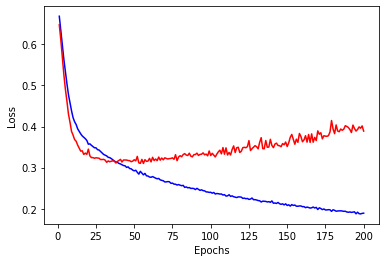

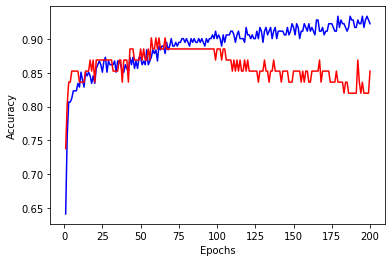

In [81]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, accuracy, 'b-')
plt.plot(time, val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

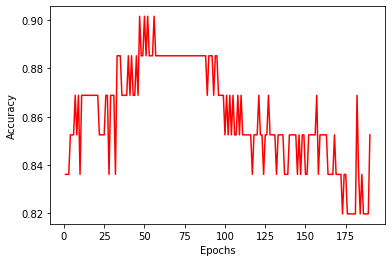

In [82]:
# Cut off the first few data points

short_val_accuracy = val_accuracy[10:]

plt.plot(range(1,len(short_val_accuracy)+1), short_val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

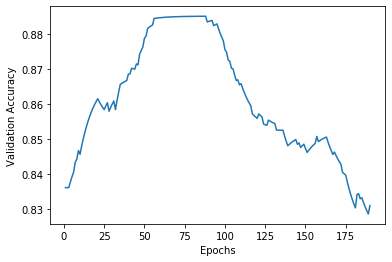

In [83]:
# Smoothen the previous curve for clarity

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_accuracy = smooth_curve(val_accuracy[10:])

plt.plot(range(1, len(smooth_val_accuracy) + 1), smooth_val_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

From the graph, it shows that the validation accuracy reaches the highest point of approximately 0.88 at around 85 epochs, so we try to rebuild the model by changing the epoch size to the optimal one.

#### Rebuild the Model

In [84]:
# Build a fresh model ...

model = Sequential()
model.add(Dense(13, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
# ... and train it for a shorter time for less overfitting 
# (now with all the training data, including the samples previously used for validation)

history = model.fit(data_train, labels_train, epochs=85, batch_size=1)

Train on 242 samples
Epoch 1/85
242/242 [==============================] - 1s 5ms/sample - loss: 0.6565 - accuracy: 0.6694
Epoch 2/85
242/242 [==============================] - 1s 2ms/sample - loss: 0.5769 - accuracy: 0.7934
Epoch 3/85
242/242 [==============================] - 0s 2ms/sample - loss: 0.5056 - accuracy: 0.8388
Epoch 4/85
242/242 [==============================] - 0s 2ms/sample - loss: 0.4518 - accuracy: 0.8430
Epoch 5/85
242/242 [==============================] - 0s 2ms/sample - loss: 0.4195 - accuracy: 0.8347
Epoch 6/85
242/242 [==============================] - 0s 2ms/sample - loss: 0.3961 - accuracy: 0.8512
Epoch 7/85
242/242 [==============================] - 0s 2ms/sample - loss: 0.3818 - accuracy: 0.8347
Epoch 8/85
242/242 [==============================] - 0s 2ms/sample - loss: 0.3701 - accuracy: 0.8471
Epoch 9/85
242/242 [==============================] - 0s 2ms/sample - loss: 0.3669 - accuracy: 0.8595
Epoch 10/85
242/242 [==============================] - 0s 2ms

242/242 [==============================] - 1s 2ms/sample - loss: 0.2767 - accuracy: 0.8802
Epoch 81/85
242/242 [==============================] - 1s 2ms/sample - loss: 0.2782 - accuracy: 0.8719
Epoch 82/85
242/242 [==============================] - 0s 2ms/sample - loss: 0.2756 - accuracy: 0.8760
Epoch 83/85
242/242 [==============================] - 1s 2ms/sample - loss: 0.2754 - accuracy: 0.8678
Epoch 84/85
242/242 [==============================] - 0s 2ms/sample - loss: 0.2748 - accuracy: 0.8760
Epoch 85/85
242/242 [==============================] - 1s 2ms/sample - loss: 0.2770 - accuracy: 0.8719


#### Test the Model

In [86]:
# Test the model with new unseen data

test_mse_score, test_accuracy_score = model.evaluate(data_test, labels_test)

61/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [87]:
# Taking a look at test data predictions versus true targets

results = model.predict(data_test)

for i in range(len(results)):
    print(labels_test[i], results[i])

1 [0.97231865]
0 [0.02706692]
1 [0.7999948]
1 [0.9014781]
1 [0.9611849]
1 [0.60953695]
1 [0.9680958]
1 [0.844617]
0 [0.3360411]
1 [0.98509234]
0 [0.05176568]
1 [0.99760205]
0 [0.06696826]
1 [0.7201093]
0 [0.16591951]
0 [0.7090379]
0 [0.47062838]
0 [0.04549962]
1 [0.5132201]
0 [0.01214072]
1 [0.4504328]
0 [0.02665356]
1 [0.94938064]
0 [0.18651056]
0 [0.01360893]
0 [0.20159039]
1 [0.96819544]
0 [0.01041889]
1 [0.08512008]
1 [0.59040225]
1 [0.7142917]
0 [0.75307906]
1 [0.02256742]
1 [0.53258187]
1 [0.990181]
0 [0.81103575]
1 [0.9144918]
1 [0.64939564]
0 [0.13269669]
1 [0.02587628]
1 [0.9824611]
1 [0.10897422]
1 [0.90801966]
1 [0.31581682]
0 [0.01620069]
1 [0.9900414]
1 [0.98179555]
0 [0.02132809]
1 [0.9961221]
0 [0.02991578]
0 [0.02380279]
1 [0.9957458]
0 [0.29866466]
0 [0.00924903]
0 [0.03862554]
1 [0.86343545]
1 [0.9939747]
1 [0.99617016]
1 [0.97301567]
1 [0.9985874]
0 [0.9884723]


###  Imputing the missing values with Median and Preprocessing data using StandardScaler

### Data

#### Read in the dataset from .csv file

In [88]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', index_col=None, header=None, names=cols, na_values='?')

#### Fill the missing value with mean

In [89]:
df = df.fillna(df.median())
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


#### Separate Data and Label

In [90]:
data = df.iloc[:, 0:13]
labels = df.iloc[:, 13]

#### Treat any value higher than one as one

In [91]:
labels = labels.replace(2,1)
labels = labels.replace(3,1)
labels = labels.replace(4,1)

### Data Preprocessing

#### Convert Dataframe to Numpy Array

In [92]:
data = data.to_numpy()
labels = labels.to_numpy()

#### Preprocessing data using StandardScaler

In [93]:
scaler = preprocessing.StandardScaler().fit(data)

In [94]:
data_scaler = scaler.transform(data)

### Models and Training

#### Split data into Training set, Validation set and Testing set

In [95]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, random_state=112, test_size=0.20)

In [96]:
data_train_partial, data_val, labels_train_partial, labels_val = train_test_split(data_train, labels_train, random_state=112, test_size=0.25)

#### Construct the Model Architecture

In [97]:
model = Sequential()
model.add(Dense(13, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Build the Model

We train the model using epoch equal to 200 and batch sizes equal to 1 to find the best epoch for our model.

In [98]:
history = model.fit(data_train_partial, labels_train_partial, epochs=200, batch_size=1, validation_data=(data_val, labels_val))

Train on 181 samples, validate on 61 samples
Epoch 1/200
181/181 [==============================] - 2s 9ms/sample - loss: 1.8869 - accuracy: 0.5691 - val_loss: 1.6931 - val_accuracy: 0.4918
Epoch 2/200
181/181 [==============================] - 1s 4ms/sample - loss: 1.2623 - accuracy: 0.5304 - val_loss: 1.0661 - val_accuracy: 0.4754
Epoch 3/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.8976 - accuracy: 0.5525 - val_loss: 0.8002 - val_accuracy: 0.6066
Epoch 4/200
181/181 [==============================] - 1s 4ms/sample - loss: 0.8477 - accuracy: 0.6188 - val_loss: 0.6743 - val_accuracy: 0.6721
Epoch 5/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.7652 - accuracy: 0.6022 - val_loss: 0.5986 - val_accuracy: 0.7049
Epoch 6/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.7309 - accuracy: 0.6409 - val_loss: 0.5381 - val_accuracy: 0.8033
Epoch 7/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.6555 -

Epoch 57/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4667 - accuracy: 0.7956 - val_loss: 0.3140 - val_accuracy: 0.9016
Epoch 58/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4325 - accuracy: 0.7956 - val_loss: 0.4690 - val_accuracy: 0.8361
Epoch 59/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4471 - accuracy: 0.8011 - val_loss: 0.3286 - val_accuracy: 0.8852
Epoch 60/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4430 - accuracy: 0.8011 - val_loss: 0.3380 - val_accuracy: 0.9180
Epoch 61/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4553 - accuracy: 0.7956 - val_loss: 0.3247 - val_accuracy: 0.9016
Epoch 62/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4291 - accuracy: 0.8066 - val_loss: 0.3063 - val_accuracy: 0.9016
Epoch 63/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4425 - accuracy: 0.8122 - val_loss: 0.3202 -

181/181 [==============================] - 0s 2ms/sample - loss: 0.4086 - accuracy: 0.8177 - val_loss: 0.4706 - val_accuracy: 0.8033
Epoch 114/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.5031 - accuracy: 0.7514 - val_loss: 0.3747 - val_accuracy: 0.9016
Epoch 115/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.3957 - accuracy: 0.8343 - val_loss: 0.5069 - val_accuracy: 0.8033
Epoch 116/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.3742 - accuracy: 0.8453 - val_loss: 0.4981 - val_accuracy: 0.7869
Epoch 117/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4521 - accuracy: 0.7956 - val_loss: 0.5507 - val_accuracy: 0.7705
Epoch 118/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4231 - accuracy: 0.8011 - val_loss: 0.3596 - val_accuracy: 0.8525
Epoch 119/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4065 - accuracy: 0.8066 - val_loss: 0.4828 - val_ac

Epoch 169/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4052 - accuracy: 0.8453 - val_loss: 0.3449 - val_accuracy: 0.8852
Epoch 170/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4180 - accuracy: 0.8453 - val_loss: 0.3940 - val_accuracy: 0.8525
Epoch 171/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.3762 - accuracy: 0.8287 - val_loss: 0.3540 - val_accuracy: 0.8852
Epoch 172/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.3952 - accuracy: 0.8564 - val_loss: 0.5398 - val_accuracy: 0.7377
Epoch 173/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4212 - accuracy: 0.8398 - val_loss: 0.3812 - val_accuracy: 0.8525
Epoch 174/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4139 - accuracy: 0.8066 - val_loss: 0.4297 - val_accuracy: 0.8361
Epoch 175/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.3800 - accuracy: 0.8287 - val_loss: 0

### Results

#### Plot the training and validation Loss and Accuracy Graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


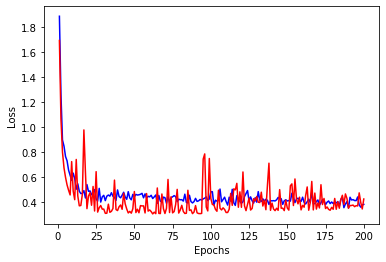

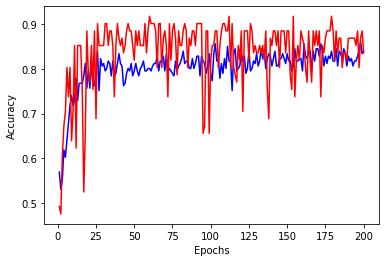

In [99]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, accuracy, 'b-')
plt.plot(time, val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

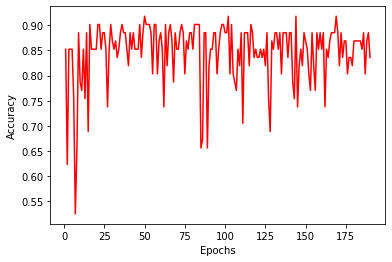

In [100]:
# Cut off the first few data points

short_val_accuracy = val_accuracy[10:]

plt.plot(range(1,len(short_val_accuracy)+1), short_val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

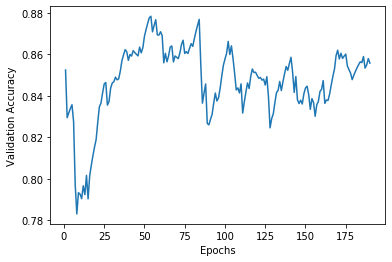

In [101]:
# Smoothen the previous curve for clarity

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_accuracy = smooth_curve(val_accuracy[10:])

plt.plot(range(1, len(smooth_val_accuracy) + 1), smooth_val_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

From the graph, it shows that the validation accuracy reaches the highest point of approximately 0.91 at around 60 epochs, so we try to rebuild the model by changing the epoch size to the optimal one.

#### Rebuild the Model

In [102]:
# Build a fresh model ...

model = Sequential()
model.add(Dense(13, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
# ... and train it for a shorter time for less overfitting 
# (now with all the training data, including the samples previously used for validation)

history = model.fit(data_train, labels_train, epochs=60, batch_size=1)

Train on 242 samples
Epoch 1/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.4234 - accuracy: 0.8017
Epoch 2/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.4174 - accuracy: 0.8264
Epoch 3/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.4784 - accuracy: 0.8140
Epoch 4/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.4330 - accuracy: 0.8140
Epoch 5/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.4200 - accuracy: 0.8388
Epoch 6/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.5324 - accuracy: 0.7686
Epoch 7/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.4444 - accuracy: 0.8264
Epoch 8/60
242/242 [==============================] - 0s 2ms/sample - loss: 0.4205 - accuracy: 0.8554
Epoch 9/60
242/242 [==============================] - 1s 2ms/sample - loss: 0.3973 - accuracy: 0.8430
Epoch 10/60
242/242 [==============================] - 0s 2ms

#### Test the Model

In [105]:
# Test the model with new unseen data

test_mse_score, test_accuracy_score = model.evaluate(data_test, labels_test)

61/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [106]:
# Taking a look at test data predictions versus true targets

results = model.predict(data_test)

for i in range(len(results)):
    print(labels_test[i], results[i])

1 [0.73874325]
0 [0.00877929]
1 [0.68985176]
1 [0.83274835]
1 [0.9494064]
1 [0.7968058]
1 [0.94721323]
1 [0.5022112]
0 [0.08364996]
1 [0.97455406]
0 [0.01629212]
1 [0.99177724]
0 [0.01037055]
1 [0.8356335]
0 [0.03343418]
0 [0.18797478]
0 [0.07720447]
0 [0.01898485]
1 [0.59719044]
0 [0.00826088]
1 [0.11723462]
0 [0.00272092]
1 [0.69334686]
0 [0.05466798]
0 [0.00573844]
0 [0.02730748]
1 [0.9231021]
0 [0.0049729]
1 [0.01342389]
1 [0.4400406]
1 [0.8749073]
0 [0.5058571]
1 [0.0101459]
1 [0.2756654]
1 [0.9853878]
0 [0.761011]
1 [0.87884367]
1 [0.1246559]
0 [0.0103378]
1 [0.01759735]
1 [0.93228996]
1 [0.05949971]
1 [0.76811343]
1 [0.07691735]
0 [0.0078598]
1 [0.9682649]
1 [0.9410944]
0 [0.0103364]
1 [0.99248636]
0 [0.0145123]
0 [0.01119801]
1 [0.98729885]
0 [0.08740741]
0 [0.00456458]
0 [0.03968221]
1 [0.46308938]
1 [0.9824575]
1 [0.99269783]
1 [0.854723]
1 [0.99821997]
0 [0.9723637]


###  Imputing the missing values with Median (same data) and Preprocessing data using Normalization

#### Preprocessing data using Normalization

In [107]:
minmax_scaler = preprocessing.MinMaxScaler()

In [108]:
data = minmax_scaler.fit_transform(data)

### Models and Training

#### Split data into Training set, Validation set and Testing set

In [109]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, random_state=112, test_size=0.20)

In [110]:
data_train_partial, data_val, labels_train_partial, labels_val = train_test_split(data_train, labels_train, random_state=112, test_size=0.25)

#### Construct the Model Architecture

In [111]:
model = Sequential()
model.add(Dense(13, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Build the Model

We train the model using epoch equal to 200 and batch sizes equal to 1 to find the best epoch for our model.

In [112]:
history = model.fit(data_train_partial, labels_train_partial, epochs=200, batch_size=1, validation_data=(data_val, labels_val))

Train on 181 samples, validate on 61 samples
Epoch 1/200
181/181 [==============================] - 2s 9ms/sample - loss: 0.6729 - accuracy: 0.5635 - val_loss: 0.6561 - val_accuracy: 0.6230
Epoch 2/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.6249 - accuracy: 0.6685 - val_loss: 0.5962 - val_accuracy: 0.7869
Epoch 3/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.5624 - accuracy: 0.7845 - val_loss: 0.5179 - val_accuracy: 0.8525
Epoch 4/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.5136 - accuracy: 0.8011 - val_loss: 0.4705 - val_accuracy: 0.8361
Epoch 5/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.4725 - accuracy: 0.8232 - val_loss: 0.4258 - val_accuracy: 0.8361
Epoch 6/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.4482 - accuracy: 0.8287 - val_loss: 0.3970 - val_accuracy: 0.8361
Epoch 7/200
181/181 [==============================] - 0s 3ms/sample - loss: 0.4256 -

Epoch 57/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.3027 - accuracy: 0.8674 - val_loss: 0.3106 - val_accuracy: 0.9016
Epoch 58/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2982 - accuracy: 0.8619 - val_loss: 0.3257 - val_accuracy: 0.8525
Epoch 59/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2977 - accuracy: 0.8564 - val_loss: 0.3254 - val_accuracy: 0.8525
Epoch 60/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2967 - accuracy: 0.8564 - val_loss: 0.3097 - val_accuracy: 0.9016
Epoch 61/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2994 - accuracy: 0.8619 - val_loss: 0.3263 - val_accuracy: 0.8525
Epoch 62/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2936 - accuracy: 0.8564 - val_loss: 0.3082 - val_accuracy: 0.9016
Epoch 63/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2950 - accuracy: 0.8729 - val_loss: 0.3094 -

181/181 [==============================] - 0s 2ms/sample - loss: 0.2432 - accuracy: 0.9116 - val_loss: 0.3517 - val_accuracy: 0.9180
Epoch 114/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2412 - accuracy: 0.9006 - val_loss: 0.3775 - val_accuracy: 0.8689
Epoch 115/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2428 - accuracy: 0.9061 - val_loss: 0.3607 - val_accuracy: 0.8852
Epoch 116/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2405 - accuracy: 0.9061 - val_loss: 0.3387 - val_accuracy: 0.9180
Epoch 117/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2357 - accuracy: 0.8950 - val_loss: 0.3990 - val_accuracy: 0.8361
Epoch 118/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2425 - accuracy: 0.9116 - val_loss: 0.3760 - val_accuracy: 0.8525
Epoch 119/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.2370 - accuracy: 0.9282 - val_loss: 0.3364 - val_ac

Epoch 169/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1920 - accuracy: 0.9337 - val_loss: 0.4730 - val_accuracy: 0.8197
Epoch 170/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1983 - accuracy: 0.9392 - val_loss: 0.4268 - val_accuracy: 0.8197
Epoch 171/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1932 - accuracy: 0.9282 - val_loss: 0.4007 - val_accuracy: 0.8852
Epoch 172/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1944 - accuracy: 0.9282 - val_loss: 0.3699 - val_accuracy: 0.8689
Epoch 173/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1923 - accuracy: 0.9282 - val_loss: 0.3949 - val_accuracy: 0.8689
Epoch 174/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1904 - accuracy: 0.9282 - val_loss: 0.4375 - val_accuracy: 0.8361
Epoch 175/200
181/181 [==============================] - 0s 2ms/sample - loss: 0.1951 - accuracy: 0.9337 - val_loss: 0

### Results

#### Plot the training and validation Loss and Accuracy Graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


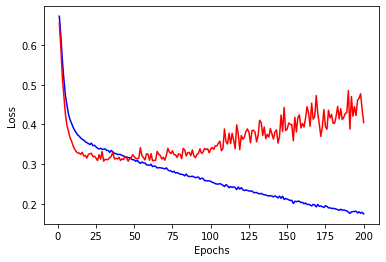

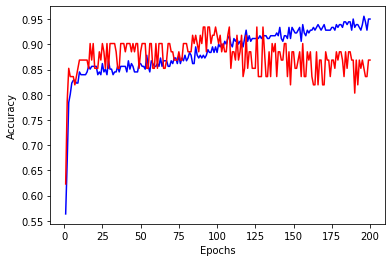

In [113]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, accuracy, 'b-')
plt.plot(time, val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

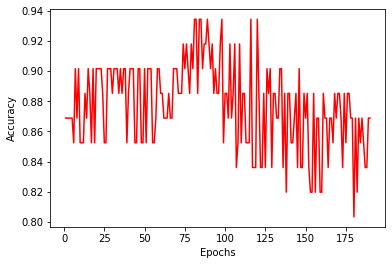

In [114]:
# Cut off the first few data points

short_val_accuracy = val_accuracy[10:]

plt.plot(range(1,len(short_val_accuracy)+1), short_val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

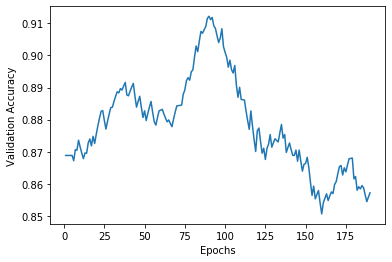

In [115]:
# Smoothen the previous curve for clarity

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_accuracy = smooth_curve(val_accuracy[10:])

plt.plot(range(1, len(smooth_val_accuracy) + 1), smooth_val_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

From the graph, it shows that the validation accuracy reaches the highest point of approximately 0.9 at around 95 epochs, so we try to rebuild the model by changing the epoch size to the optimal one.

#### Rebuild the Model

In [116]:
# Build a fresh model ...

model = Sequential()
model.add(Dense(13, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
# ... and train it for a shorter time for less overfitting 
# (now with all the training data, including the samples previously used for validation)

history = model.fit(data_train, labels_train, epochs=95, batch_size=1)

Train on 242 samples
Epoch 1/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2840 - accuracy: 0.8719
Epoch 2/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2818 - accuracy: 0.8595
Epoch 3/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2825 - accuracy: 0.8554
Epoch 4/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2849 - accuracy: 0.8636
Epoch 5/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2830 - accuracy: 0.8595
Epoch 6/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2826 - accuracy: 0.8595
Epoch 7/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2846 - accuracy: 0.8719
Epoch 8/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2764 - accuracy: 0.8802
Epoch 9/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2828 - accuracy: 0.8595
Epoch 10/95
242/242 [==============================] - 0s 2ms

242/242 [==============================] - 0s 2ms/sample - loss: 0.2529 - accuracy: 0.8760
Epoch 81/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2598 - accuracy: 0.8802
Epoch 82/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2530 - accuracy: 0.8884
Epoch 83/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2537 - accuracy: 0.8884
Epoch 84/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2526 - accuracy: 0.8843
Epoch 85/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2546 - accuracy: 0.8926
Epoch 86/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2551 - accuracy: 0.8884
Epoch 87/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2528 - accuracy: 0.9008
Epoch 88/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2517 - accuracy: 0.8967
Epoch 89/95
242/242 [==============================] - 0s 2ms/sample - loss: 0.2524 -

#### Test the Model

In [119]:
# Test the model with new unseen data

test_mse_score, test_accuracy_score = model.evaluate(data_test, labels_test)

61/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [120]:
# Taking a look at test data predictions versus true targets

results = model.predict(data_test)

for i in range(len(results)):
    print(labels_test[i], results[i])

1 [0.96820503]
0 [0.00465414]
1 [0.8493122]
1 [0.87478566]
1 [0.95829993]
1 [0.66712785]
1 [0.9526626]
1 [0.86621755]
0 [0.22260723]
1 [0.98679936]
0 [0.06521538]
1 [0.9981718]
0 [0.05177984]
1 [0.6395164]
0 [0.15969127]
0 [0.32715714]
0 [0.61177987]
0 [0.02950364]
1 [0.47089148]
0 [0.02053824]
1 [0.20140123]
0 [0.00196841]
1 [0.98923457]
0 [0.08387077]
0 [0.0026139]
0 [0.07512543]
1 [0.8981021]
0 [0.00087866]
1 [0.06526032]
1 [0.7906963]
1 [0.8779944]
0 [0.4401795]
1 [0.00721133]
1 [0.520639]
1 [0.9895698]
0 [0.8104005]
1 [0.94267935]
1 [0.6004656]
0 [0.06183979]
1 [0.01714158]
1 [0.9890715]
1 [0.18508631]
1 [0.92393816]
1 [0.18187502]
0 [0.02242756]
1 [0.99835527]
1 [0.9842183]
0 [0.00544503]
1 [0.9976877]
0 [0.04969114]
0 [0.03707138]
1 [0.9972364]
0 [0.13716713]
0 [0.00309834]
0 [0.00314057]
1 [0.86451036]
1 [0.9989345]
1 [0.9977326]
1 [0.9669855]
1 [0.999283]
0 [0.99680734]


### Finalized Result

In this case1, we compare each model base on the accuracy score and Loss values that each model gets from test set data. It outcomes with six results from different six models which are as following :

Accuracy


<table style="width:80%">
  <tr>
    <th></th>
    <th>StandardScaler</th>
    <th>Normalization</th> 
  </tr>
  <tr>
    <td>Nan=0</td>
    <td>0.8197</td> 
    <td>0.7869</td>
  </tr>
  <tr>
    <td>Nan=Mean</td>
    <td>0.8033</td> 
    <td>0.8361</td>
  </tr>
    <tr>
    <td>Nan=Median	</td>
    <td>0.7869</td> 
    <td>0.8361</td>
  </tr>
</table>

Loss


<table style="width:80%">
  <tr>
    <th></th>
    <th>StandardScaler</th>
    <th>Normalization</th> 
  </tr>
  <tr>
    <td>Nan=0</td>
    <td>0.5637</td> 
    <td>0.6105 </td>
  </tr>
  <tr>
    <td>Nan=Mean</td>
    <td>0.7471</td> 
    <td>0.5744</td>
  </tr>
    <tr>
    <td>Nan=Median	</td>
    <td>0.7104 </td> 
    <td>0.6305</td>
  </tr>
</table>

 ### Conclusion

In conclusion, we have investigated several techniques for data preprocessing and imputating missing values in the dataset to find the effective model for predicting the presence of heart disease. The result comes out that the best techniques used to predict the model from this dataset are "Imputating missing values with mean and preprocessing data using normalization", which gives the accuracy of 0.8361 and loss value of 0.5744.

In constructing neural network model architectures, we tested various values of batch sizes and number of epochs for training data. We tried on a batch size of 1, 5, 10 and 20 respectively and found that increasing batch size doesn't make this model more effective since the accuracy doesn't increase. Therefore, we decided to use the batch size of 1 to predict the model. 

Also, we changed the number of epochs according to the outcome from the 'Validation accuracy vs. Epoch graph' of the result after training each model.Thus, we noticed what the smallest number of epoches is that gives highest accuracy value.

Moreover, we designed the model architecture with 1 input layer, 1 hidden layer with 13 neurons and rectified linear unit (ReLU) activation function, and 1 output layer with 1 neuron and sigmoid activation function. Since there are 13 input variables used for training the model, so the least there should be 13 neurons in the hidden layer. Upon testing model, we tried increasing number of neurons, but the outcome did not give better result than the previous model.
Therefore, we built the model with 13 neurons in the hidden layer to not make model to complicated.

To finalize, our model is accurate but since the number of samples used for training the model is a small set, only 303 samples, the prediction model is not stable every time the program is rerun. The accuracy might be increase or decrease slightly compared with the previous results. Therefore, to improve the accuracy of this model, more group of samples should be used to train the model.